In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,LancasterStemmer
from nltk.corpus import stopwords
from string import punctuation
import contractions
from unidecode import unidecode
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from autocorrect import Speller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("immverse_ai_eval_dataset (3) (2) (1).xlsx")

In [3]:
data

,id,sentence,voice
0,1,The chef prepares the meal.,Active
1,2,The teacher explains the lesson clearly.,Active
2,3,The gardener waters the plants every morning.,Active
3,4,The kids play soccer in the park.,Active
4,5,The author wrote a thrilling novel.,Active
5,6,The scientist conducts experiments in the lab.,Active
6,7,The company launched a new product.,Active
7,8,The artist paints a beautiful portrait.,Active
8,9,The musician composes a melody.,Active
9,10,The photographer takes stunning pictures.,Active


In [4]:
data.describe(include="all")

,id,sentence,voice
count,40.000000,40,40
unique,NaN,40,2
top,NaN,The chef prepares the meal.,Active
freq,NaN,1,20
mean,20.500000,NaN,NaN
std,11.690452,NaN,NaN
min,1.000000,NaN,NaN
25%,10.750000,NaN,NaN
50%,20.500000,NaN,NaN
75%,30.250000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        40 non-null     int64 
 1   sentence  40 non-null     object
 2   voice     40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
data["voice"].value_counts()

Active     20
Passive    20
Name: voice, dtype: int64

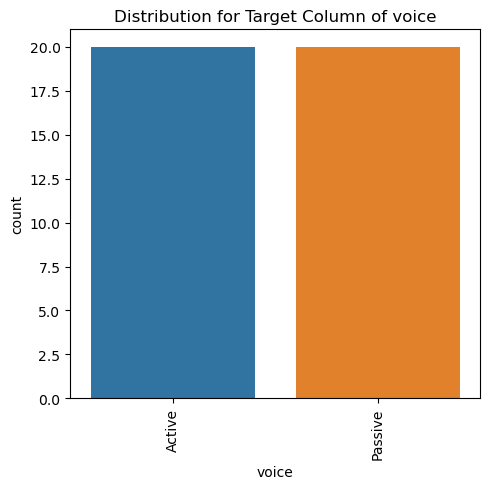

In [7]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x =data["voice"].fillna("").astype(str), order=sorted(data["voice"].fillna("").astype(str).unique()))
plt.xticks(rotation=90)
plt.title("Distribution for Target Column of voice")
fig.tight_layout()

In [8]:
#for removing spaces from data
def remove_spaces(data):
    clean_text=data.replace("\\n"," ").replace("\t"," ").replace("\\"," ")
    return clean_text


#for example changing can't == cannot
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

#for handling letters like ž ==z
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

#removing not ,nor ,no from stopword_list
stopwords_list = stopwords.words("english")
stopwords_list.remove("nor")
stopwords_list.remove("not")
stopwords_list.remove("no")

#removing punctuation ,stopwords and taking only words which are having len more than 2 words and taking only alphabets only 
def clean_text(data):
    tokens = word_tokenize(data)
    clean_text1 = [word.lower() for word in tokens if (word not in punctuation) and  (word.isalpha())]
    return clean_text1

#creating autocorrection function 
def autocorrection(data):
    spell = Speller("english")
    corrected_data = spell(data)
    return corrected_data

def lemmatization(data):
    lemmatizer = LancasterStemmer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.stem(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)
    
    
    

In [9]:
data["voice"].replace({"Active":0,"Passive":1},inplace=True)
y=data["voice"]


In [10]:
x_train, x_temp, y_train, y_temp = train_test_split(data["sentence"],data["voice"], test_size=0.4, random_state=42,stratify=y)


In [11]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [12]:
x_train

34          The application is coded by the programmer.
16             The manager organizes the work schedule.
5        The scientist conducts experiments in the lab.
8                       The musician composes a melody.
39    The assignment is submitted on time by the stu...
13                   The engineer designs a new bridge.
24         A thrilling novel was written by the author.
25    Experiments are conducted in the lab by the sc...
0                           The chef prepares the meal.
15         The architect draws the plans for the house.
3                     The kids play soccer in the park.
27       A beautiful portrait is painted by the artist.
22    The plants are watered every morning by the ga...
35    The plans for the house are drawn by the archi...
2         The gardener waters the plants every morning.
23            Soccer is played in the park by the kids.
17         The waiter serves the customers efficiently.
29     Stunning pictures are taken by the photog

In [13]:
clean_text_train = x_train.apply(remove_spaces)
clean_text_test =x_test.apply(remove_spaces)
clean_text_val=x_val.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)
clean_text_test =clean_text_test.apply(expand_text)
clean_text_val=clean_text_val.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)
clean_text_test =clean_text_test.apply(handling_accented)
clean_text_val=clean_text_val.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_text)
clean_text_test =clean_text_test.apply(clean_text)
clean_text_val=clean_text_val.apply(clean_text)

clean_text_train = clean_text_train.apply(lemmatization)
clean_text_test =clean_text_test.apply(lemmatization)
clean_text_val=clean_text_val.apply(lemmatization)

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,max_features=1000)
x_train_vec = tfidf_vectorizer.fit_transform(clean_text_train)
x_test_vec = tfidf_vectorizer.transform(clean_text_test)
x_val_vec = tfidf_vectorizer.transform(clean_text_val)

In [15]:
pd.DataFrame(x_train_vec.toarray() ,columns=tfidf_vectorizer.get_feature_names_out())

,acc,apply,ar,architect,art,assign,auth,beauty,bridg,by,...,tak,teach,thrilling,tim,transport,wait,was,wat,work,writ
0,0.00000,0.524455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246023,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.421238,0.000000,0.000000,0.000000,0.197603,...,0.000000,0.0,0.000000,0.421238,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540053,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447067,0.000000,0.000000,0.209720,...,0.000000,0.0,0.447067,0.000000,0.0,0.0,0.395654,0.000000,0.000000,0.447067
7,0.00000,0.000000,0.350907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222414,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.435327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [16]:
clf = BernoulliNB()
clf.fit(x_train_vec.toarray(), y_train)

BernoulliNB()

In [17]:
def evaluation(model,x,y):
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    class_report = classification_report(y,y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

In [18]:
print("Training data evaluation".center(50,"*"))
evaluation(clf,x_train_vec.toarray(),y_train)

*************Training data evaluation*************
Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [19]:
print("Testing data evaluation".center(50,"*"))
evaluation(clf,x_test_vec.toarray() ,y_test)

*************Testing data evaluation**************
Accuracy: 1.00
Confusion Matrix:
[[4 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [20]:
print("Validation data evaluation".center(50,"*"))
evaluation(clf,x_val_vec.toarray(),y_val)

************Validation data evaluation************
Accuracy: 1.00
Confusion Matrix:
[[4 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

